In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv('sign_mnist_train.csv')
test = pd.read_csv('sign_mnist_test.csv')

In [3]:
train.shape

(27455, 785)

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
train_labels= train['label'].values
test_labels=test['label'].values

In [6]:
train_labels

array([ 3,  6,  2, ..., 18, 17, 23], dtype=int64)

In [7]:
test_labels

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [8]:
train=train.drop(['label'], axis=1)
test=test.drop(['label'], axis=1)

In [9]:
train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [10]:
train.shape

(27455, 784)

In [11]:
train=train/255.0
test=test/255.0

In [12]:
x_train, x_val, y_train, y_val = train_test_split(train, train_labels, test_size = 0.3, random_state = 5)

In [13]:
x_train=x_train.to_numpy()

In [14]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)

In [15]:
x_val=x_val.to_numpy()

In [16]:
x_val = x_val.reshape(x_val.shape[0], 28, 28, 1)

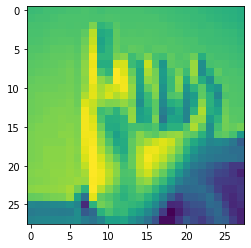

In [17]:
plt.imshow(x_train[0].reshape(28,28))

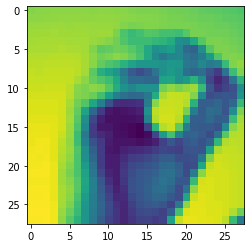

In [18]:
plt.imshow(x_val[0].reshape(28,28))

In [19]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(25, activation='softmax')
])

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [21]:
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               204928    
_________________________________________________________________
dense_1 (Dense)              (None, 25)                3

In [22]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs=5, batch_size=32)

Train on 19218 samples, validate on 8237 samples
Epoch 1/5
19218/19218 [==============================] - 35s 2ms/sample - loss: 1.1681 - accuracy: 0.6544 - val_loss: 0.2287 - val_accuracy: 0.9406
Epoch 2/5
19218/19218 [==============================] - 35s 2ms/sample - loss: 0.1024 - accuracy: 0.9755 - val_loss: 0.0257 - val_accuracy: 0.9978
Epoch 3/5
19218/19218 [==============================] - 34s 2ms/sample - loss: 0.0168 - accuracy: 0.9982 - val_loss: 0.0079 - val_accuracy: 0.9998
Epoch 4/5
19218/19218 [==============================] - 34s 2ms/sample - loss: 0.0036 - accuracy: 0.9999 - val_loss: 0.0023 - val_accuracy: 1.0000
Epoch 5/5
19218/19218 [==============================] - 34s 2ms/sample - loss: 0.0015 - accuracy: 1.0000 - val_loss: 0.0017 - val_accuracy: 1.0000


In [23]:
test=test.to_numpy()

In [24]:
test = test.reshape(test.shape[0], 28, 28, 1)

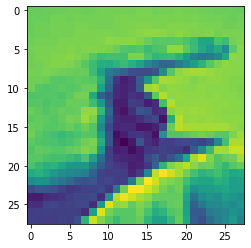

In [25]:
plt.imshow(test[0].reshape(28,28))

In [26]:
yhat=model.predict(test)

In [27]:
yhat.round()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [28]:
test_labels

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [29]:
yhat=np.argmax(yhat,axis = 1)

In [30]:
yhat

array([ 6,  5, 10, ...,  2,  4,  2], dtype=int64)

In [31]:
print('Accuracy:',np.sum(yhat==test_labels)/test_labels.size*100)

Accuracy: 89.69604015616287
